In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 로드

In [6]:

print("=== 데이터 로드 ===")
df = pd.read_csv('../data/raw/cityhall.csv')
print(f"데이터 형태: {df.shape}")
print(f"컬럼명: {list(df.columns)}")

# 컬럼명 정의
columns = ['문서고유id', '제목', '부서명', '전화번호', '작성자', '등록일', '해당년도', '해당월', 
           '문서url', '구분', '전체부서명', '집행일시', '집행목적', '집행대상', '결제방법', 
           '집행금액', '비목', '장소명', '주소지', '인원수', '계절', '중복', '1인당비용']

# 컬럼명이 다를 경우 재정의
if len(df.columns) == len(columns):
    df.columns = columns

print("\n=== 기본 정보 ===")
print(df.info())

=== 데이터 로드 ===
데이터 형태: (91968, 23)
컬럼명: ['문서고유id', '제목', '부서명', '전화번호', '작성자', '등록일', '해당년도', '해당월', '문서url', '구분(시장실만 사용)', '전체부서명', '집행일시', '집행목적', '집행대상', '결제방법', '집행금액', '비목', '장소명', '주소지', '인원수', '계절', '중복', '1인당비용']

=== 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91968 entries, 0 to 91967
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   문서고유id  91968 non-null  int64  
 1   제목      91968 non-null  object 
 2   부서명     91968 non-null  object 
 3   전화번호    91968 non-null  object 
 4   작성자     91968 non-null  object 
 5   등록일     91968 non-null  object 
 6   해당년도    91968 non-null  int64  
 7   해당월     91968 non-null  int64  
 8   문서url   91968 non-null  object 
 9   구분      1531 non-null   object 
 10  전체부서명   91968 non-null  object 
 11  집행일시    91968 non-null  object 
 12  집행목적    91968 non-null  object 
 13  집행대상    91968 non-null  object 
 14  결제방법    91968 non-null  object 
 15  집행금액    91968 non-nu

In [7]:

print("\n=== 데이터 미리보기 ===")
print(df.head())


=== 데이터 미리보기 ===
     문서고유id                                             제목     부서명  \
0  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
1  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
2  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
3  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
4  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   

           전화번호  작성자         등록일  해당년도  해당월  \
0  02-2133-2614  양진혁  2023-11-09  2023   10   
1  02-2133-2614  양진혁  2023-11-09  2023   10   
2  02-2133-2614  양진혁  2023-11-09  2023   10   
3  02-2133-2614  양진혁  2023-11-09  2023   10   
4  02-2133-2614  양진혁  2023-11-09  2023   10   

                                          문서url   구분  ...                집행대상  \
0  https://opengov.seoul.go.kr/expense/29646743  NaN  ...  김민석 주무관 외 2명(총 3명)   
1  https://opengov.seoul.go.kr/expense/29646743  NaN  ...  김민석 주무관 외 2명(총 3명)   
2  https://opengov.seoul.go.kr/expe


# 2. EDA (탐색적 데이터 분석)

In [8]:


print("\n" + "="*50)
print("EDA (탐색적 데이터 분석)")
print("="*50)

# 결측값 확인
print("\n=== 결측값 현황 ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    '결측값 개수': missing_data,
    '결측값 비율(%)': missing_percent
}).sort_values('결측값 개수', ascending=False)
print(missing_df[missing_df['결측값 개수'] > 0])


EDA (탐색적 데이터 분석)

=== 결측값 현황 ===
    결측값 개수  결측값 비율(%)
구분   90437  98.335291


In [9]:


# 수치형 변수 기술통계
print("\n=== 수치형 변수 기술통계 ===")
numeric_cols = ['해당년도', '해당월', '집행금액', '인원수', '1인당비용']
for col in numeric_cols:
    if col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass

print(df[numeric_cols].describe())


=== 수치형 변수 기술통계 ===
               해당년도           해당월          집행금액           인원수         1인당비용
count  91968.000000  91968.000000  9.196800e+04  91968.000000  9.196800e+04
mean    2023.753871      6.071818  1.250130e+05      7.366617  1.947200e+04
std        0.719675      3.531769  2.339075e+05     39.462486  6.588628e+04
min     2023.000000      1.000000  0.000000e+00      1.000000  0.000000e+00
25%     2023.000000      3.000000  5.600000e+04      4.000000  1.266667e+04
50%     2024.000000      6.000000  9.100000e+04      5.000000  1.850000e+04
75%     2024.000000      9.000000  1.500000e+05      7.000000  2.483333e+04
max     2025.000000     12.000000  2.865330e+07   9988.000000  1.054500e+07


# 데이터 시각화

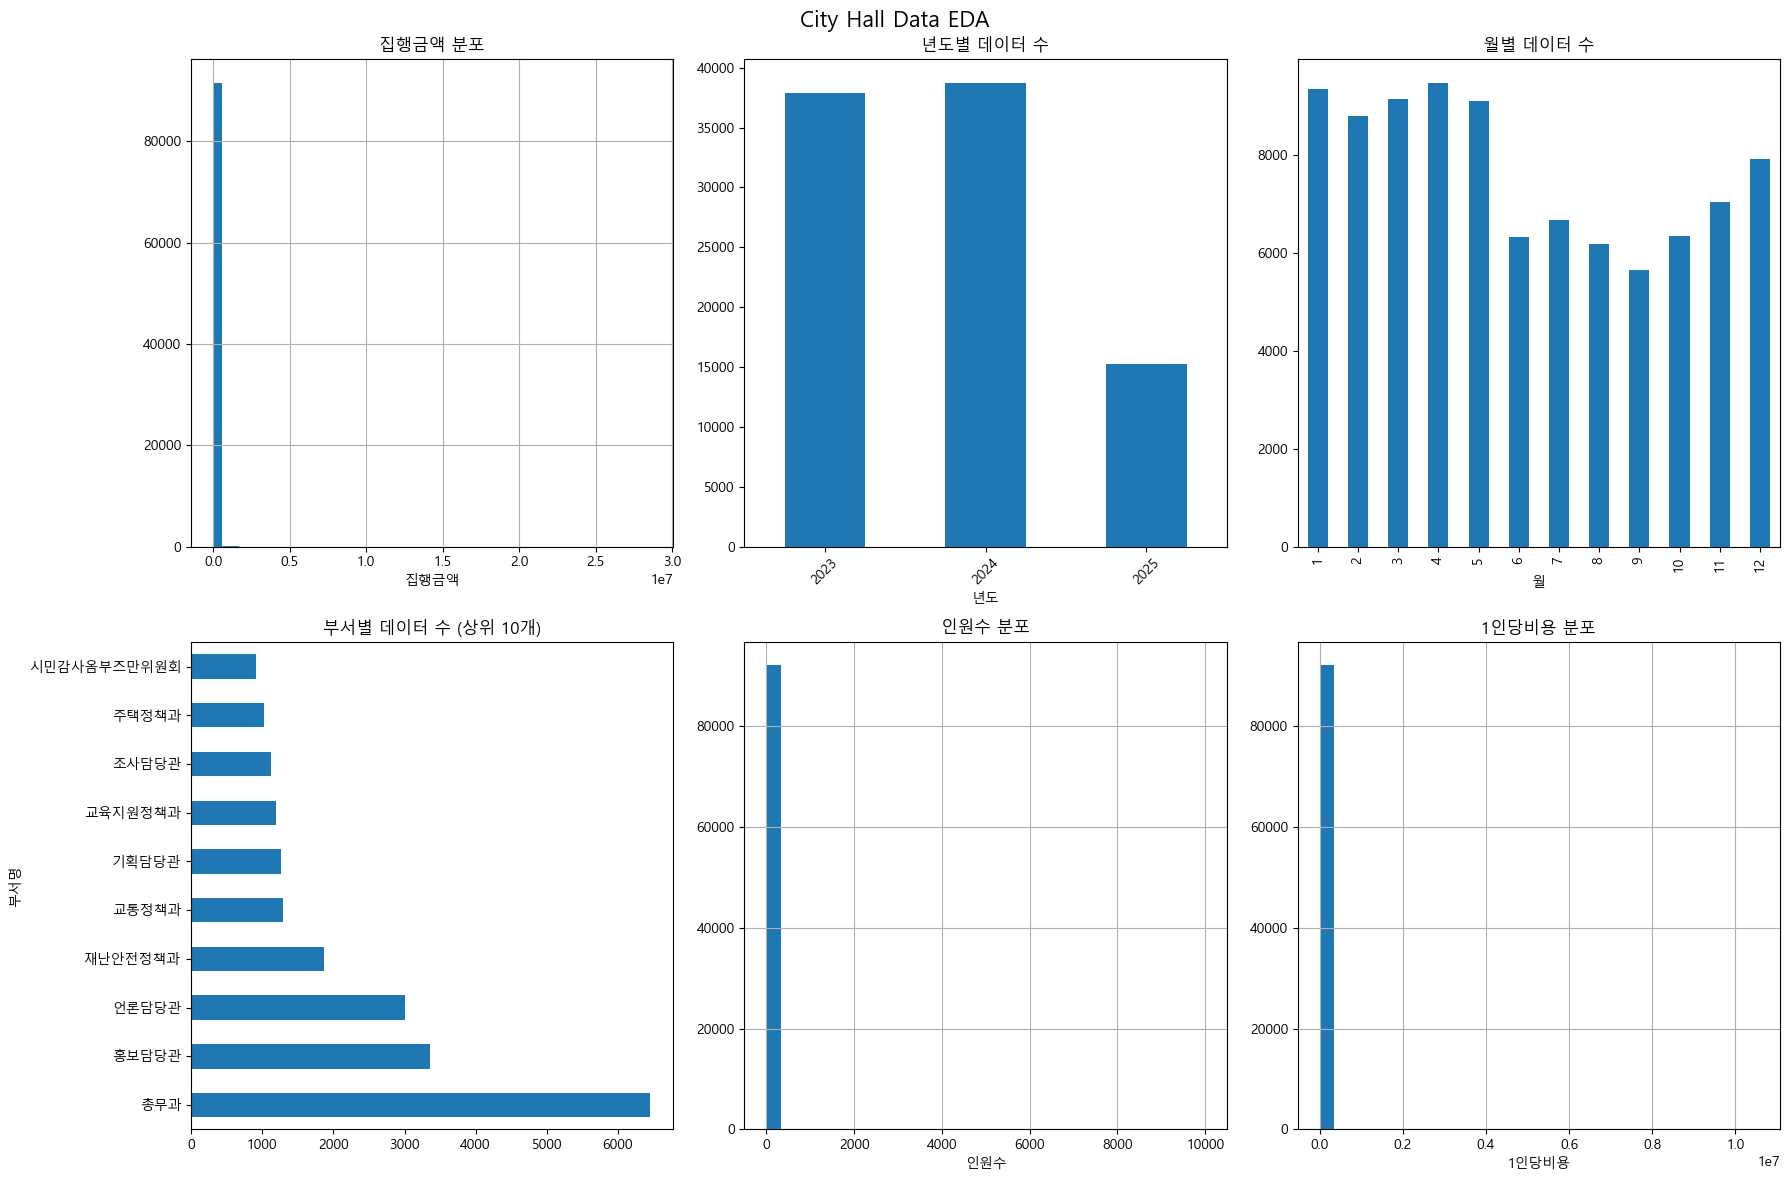

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('City Hall Data EDA', fontsize=16)
# 1. 집행금액 분포
if '집행금액' in df.columns:
    df['집행금액'].hist(bins=50, ax=axes[0,0])
    axes[0,0].set_title('집행금액 분포')
    axes[0,0].set_xlabel('집행금액')

# 2. 년도별 데이터
if '해당년도' in df.columns:
    df['해당년도'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('년도별 데이터 수')
    axes[0,1].set_xlabel('년도')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. 월별 데이터
if '해당월' in df.columns:
    df['해당월'].value_counts().sort_index().plot(kind='bar', ax=axes[0,2])
    axes[0,2].set_title('월별 데이터 수')
    axes[0,2].set_xlabel('월')

# 4. 부서별 데이터 (상위 10개)
if '부서명' in df.columns:
    top_departments = df['부서명'].value_counts().head(10)
    top_departments.plot(kind='barh', ax=axes[1,0])
    axes[1,0].set_title('부서별 데이터 수 (상위 10개)')

# 5. 인원수 분포
if '인원수' in df.columns:
    df['인원수'].hist(bins=30, ax=axes[1,1])
    axes[1,1].set_title('인원수 분포')
    axes[1,1].set_xlabel('인원수')

# 6. 1인당비용 분포
if '1인당비용' in df.columns:
    df['1인당비용'].hist(bins=30, ax=axes[1,2])
    axes[1,2].set_title('1인당비용 분포')
    axes[1,2].set_xlabel('1인당비용')

plt.tight_layout()
plt.show()


# 3. 전처리

In [11]:

print("\n" + "="*50)
print("데이터 전처리")
print("="*50)

# 전처리용 데이터프레임 복사
df_processed = df.copy()

# 결측값 처리
print("\n=== 결측값 처리 ===")
# 수치형 변수는 중앙값으로 대체
numeric_cols = ['집행금액', '인원수', '1인당비용', '해당년도', '해당월']
for col in numeric_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())

# 범주형 변수는 최빈값으로 대체
categorical_cols = ['부서명', '결제방법', '계절', '비목']
for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown')

# 이상값 처리 (IQR 방법)
print("\n=== 이상값 처리 ===")
def remove_outliers_iqr(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
        print(f"{column}: {outliers_count}개 이상값 발견")
        
        # 이상값을 경계값으로 대체
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in ['집행금액', '인원수', '1인당비용']:
    df_processed = remove_outliers_iqr(df_processed, col)

# 범주형 변수 인코딩
print("\n=== 범주형 변수 인코딩 ===")
le = LabelEncoder()
categorical_for_clustering = ['부서명', '결제방법', '계절', '비목']

for col in categorical_for_clustering:
    if col in df_processed.columns:
        df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col].astype(str))

# 클러스터링용 특성 선택
clustering_features = ['집행금액', '인원수', '1인당비용', '해당년도', '해당월']
clustering_features.extend([f'{col}_encoded' for col in categorical_for_clustering if col in df_processed.columns])

# 존재하는 컬럼만 선택
existing_features = [col for col in clustering_features if col in df_processed.columns]
X = df_processed[existing_features].copy()

print(f"클러스터링에 사용할 특성: {existing_features}")
print(f"클러스터링 데이터 형태: {X.shape}")




데이터 전처리

=== 결측값 처리 ===

=== 이상값 처리 ===
집행금액: 5796개 이상값 발견
인원수: 8608개 이상값 발견
1인당비용: 547개 이상값 발견

=== 범주형 변수 인코딩 ===
클러스터링에 사용할 특성: ['집행금액', '인원수', '1인당비용', '해당년도', '해당월', '부서명_encoded', '결제방법_encoded', '계절_encoded', '비목_encoded']
클러스터링 데이터 형태: (91968, 9)


# 4. 클러스터링


클러스터링 분석

=== 최적 클러스터 수 찾기 ===


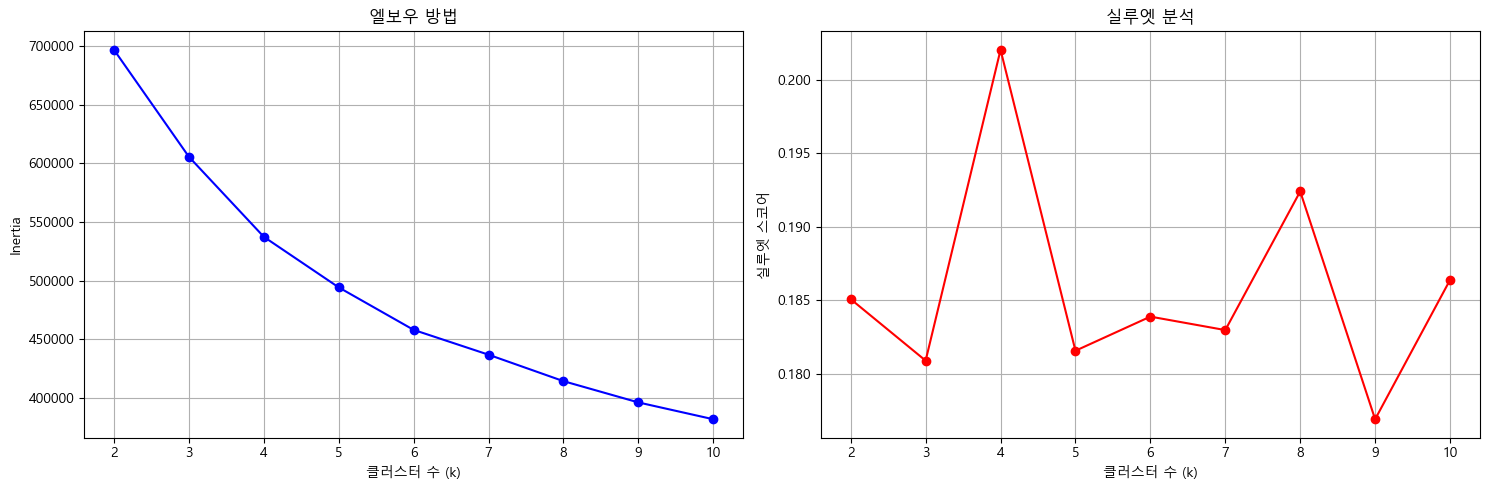

최적 클러스터 수: 4
최적 k에서의 실루엣 스코어: 0.202


In [12]:
print("\n" + "="*50)
print("클러스터링 분석")
print("="*50)

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적 클러스터 수 찾기 (엘보우 방법)
print("\n=== 최적 클러스터 수 찾기 ===")
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# 엘보우 플롯과 실루엣 스코어 플롯
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('클러스터 수 (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('엘보우 방법')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('클러스터 수 (k)')
ax2.set_ylabel('실루엣 스코어')
ax2.set_title('실루엣 분석')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 최적 클러스터 수 선택 (실루엣 스코어가 가장 높은 k)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"최적 클러스터 수: {optimal_k}")
print(f"최적 k에서의 실루엣 스코어: {max(silhouette_scores):.3f}")




=== K-Means 클러스터링 (k=4) ===

=== 클러스터별 통계 ===
                  집행금액                            인원수                   \
                  mean           std  count      mean       std  count   
Cluster                                                                  
0         86088.877569  47705.980408  18541  5.013807  2.151490  18541   
1         78892.238617  39244.475200  41795  4.815062  1.968548  41795   
2        238188.117782  50145.722048  17456  9.541189  2.023471  17456   
3         91387.128739  48735.944219  14176  5.206864  2.002082  14176   

                1인당비용                      
                 mean          std  count  
Cluster                                    
0        17407.180334  7670.805345  18541  
1        16971.721149  7341.962549  41795  
2        24478.638271  8024.851668  17456  
3        17389.116463  6435.392629  14176  

=== PCA를 이용한 클러스터 시각화 ===


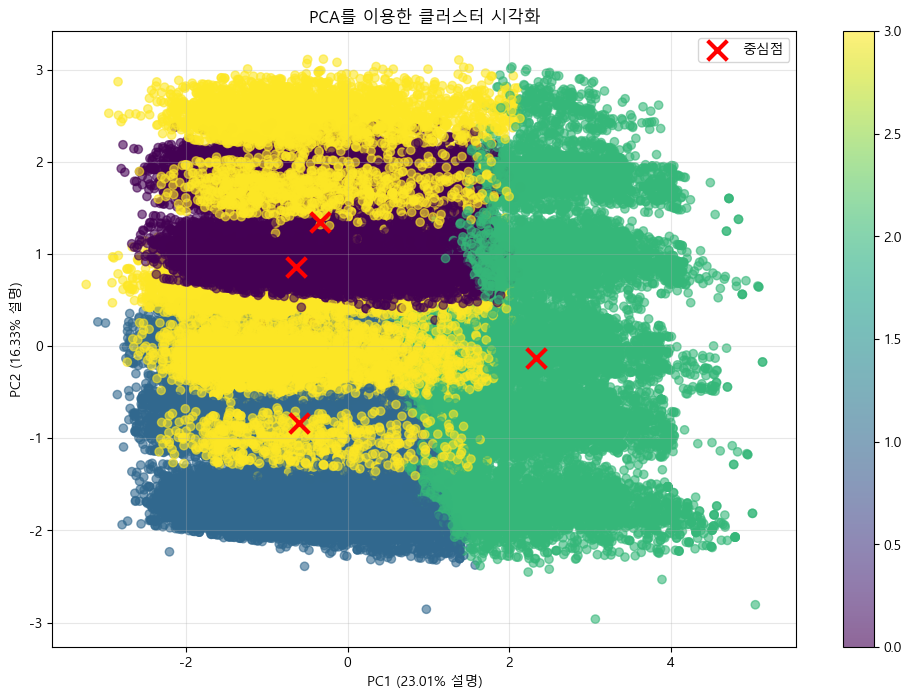


=== 클러스터별 주요 특성 분석 ===

--- 클러스터 0 ---
데이터 수: 18541
평균 집행금액: 86,089
평균 인원수: 5.0
평균 1인당비용: 17,407
주요 부서: 총무과, 언론담당관, 홍보담당관
주요 결제방법: 카드, 현금

--- 클러스터 1 ---
데이터 수: 41795
평균 집행금액: 78,892
평균 인원수: 4.8
평균 1인당비용: 16,972
주요 부서: 총무과, 언론담당관, 홍보담당관
주요 결제방법: 카드, 현금

--- 클러스터 2 ---
데이터 수: 17456
평균 집행금액: 238,188
평균 인원수: 9.5
평균 1인당비용: 24,479
주요 부서: 총무과, 홍보담당관, 재난안전정책과
주요 결제방법: 카드, 제로페이

--- 클러스터 3 ---
데이터 수: 14176
평균 집행금액: 91,387
평균 인원수: 5.2
평균 1인당비용: 17,389
주요 부서: 시민감사옴부즈만위원회, 양성평등담당관, 재무과
주요 결제방법: 제로페이


In [13]:
# 최적 k로 클러스터링 수행
print(f"\n=== K-Means 클러스터링 (k={optimal_k}) ===")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# 클러스터 결과를 원본 데이터에 추가
df_processed['Cluster'] = cluster_labels

# 클러스터별 통계
print("\n=== 클러스터별 통계 ===")
cluster_stats = df_processed.groupby('Cluster')[['집행금액', '인원수', '1인당비용']].agg(['mean', 'std', 'count'])
print(cluster_stats)

# PCA를 이용한 2D 시각화
print("\n=== PCA를 이용한 클러스터 시각화 ===")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} 설명)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} 설명)')
plt.title('PCA를 이용한 클러스터 시각화')

# 클러스터 중심점 표시
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3, label='중심점')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 클러스터별 주요 특성 분석
print("\n=== 클러스터별 주요 특성 분석 ===")
for i in range(optimal_k):
    cluster_data = df_processed[df_processed['Cluster'] == i]
    print(f"\n--- 클러스터 {i} ---")
    print(f"데이터 수: {len(cluster_data)}")
    print(f"평균 집행금액: {cluster_data['집행금액'].mean():,.0f}")
    print(f"평균 인원수: {cluster_data['인원수'].mean():.1f}")
    print(f"평균 1인당비용: {cluster_data['1인당비용'].mean():,.0f}")
    
    # 주요 부서
    if '부서명' in cluster_data.columns:
        top_dept = cluster_data['부서명'].value_counts().head(3)
        print(f"주요 부서: {', '.join(top_dept.index.tolist())}")
    
    # 주요 결제방법
    if '결제방법' in cluster_data.columns:
        top_payment = cluster_data['결제방법'].value_counts().head(2)
        print(f"주요 결제방법: {', '.join(top_payment.index.tolist())}")


In [15]:

# 결과 저장
print("\n=== 결과 저장 ===")
df_processed.to_csv('../data/processed/cityhall_clustered.csv', index=False, encoding='utf-8-sig')
print("클러스터링 결과가 '../data/processed/cityhall_clustered.csv'에 저장되었습니다.")

print("\n" + "="*50)
print("분석 완료!")
print("="*50)


=== 결과 저장 ===
클러스터링 결과가 '../data/processed/cityhall_clustered.csv'에 저장되었습니다.

분석 완료!
